In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data_final_preprocessed.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 9517 non-null   int64  
 1   age                         9517 non-null   float64
 2   gender_cd                   9517 non-null   float64
 3   region_size                 9517 non-null   object 
 4   foreign_flg                 9517 non-null   float64
 5   entrepreneur_flg            9517 non-null   float64
 6   auto_flg                    9517 non-null   float64
 7   traveler_flg                9517 non-null   float64
 8   partnership_flg             9517 non-null   float64
 9   child_amt                   9517 non-null   float64
 10  realty_type                 9517 non-null   float64
 11  segment_cd                  9517 non-null   object 
 12  bundle_nm                   9517 non-null   object 
 13  confirmed_income            964 n

# Тепловая карта

In [98]:
numeric_columns = pd.Index(
    ['age', 'child_amt', 'confirmed_income', 'predicted_income', 'state_talk_time_sec', 'emp_age',
     'emp_age_new', 'emp_children_cnt', 'emp_work_months_cnt'], dtype=object)

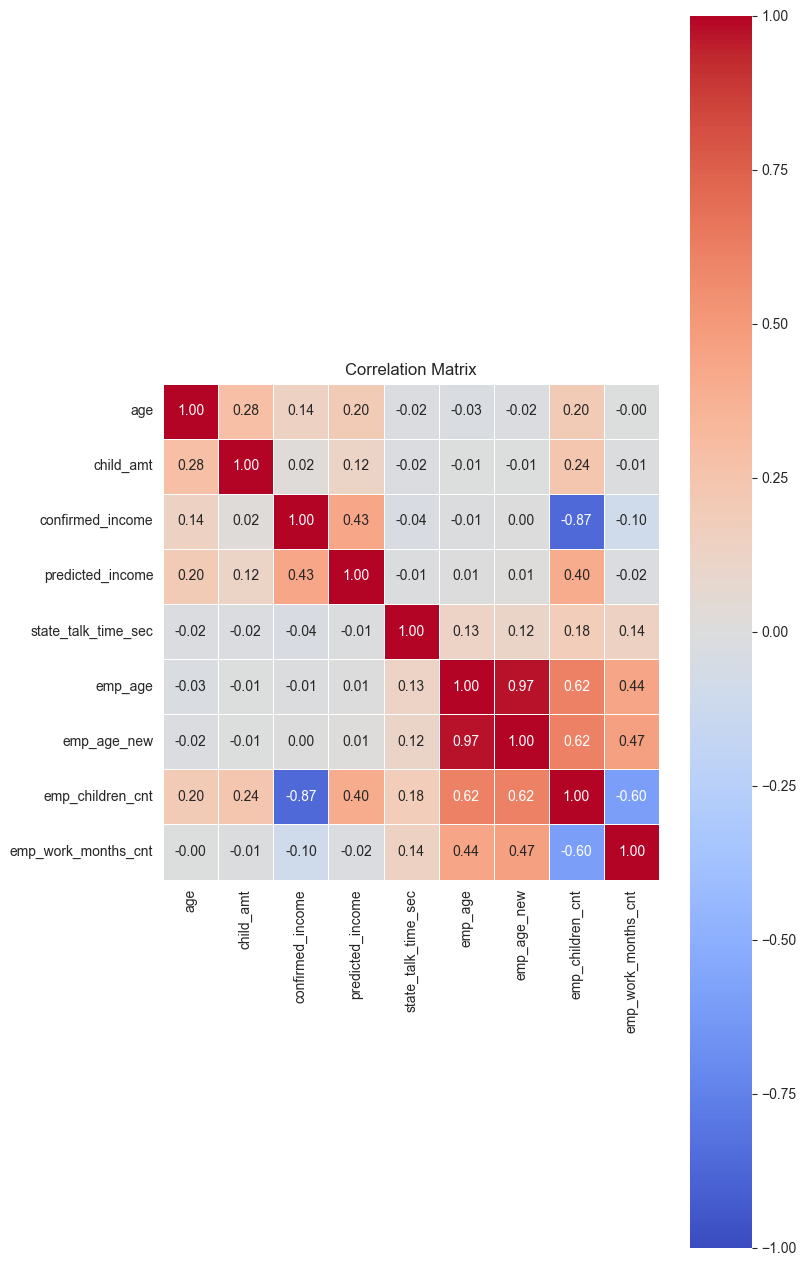

In [99]:
correlation_matrix = data[numeric_columns].corr(method='spearman')
plt.figure(figsize=(8, 16))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

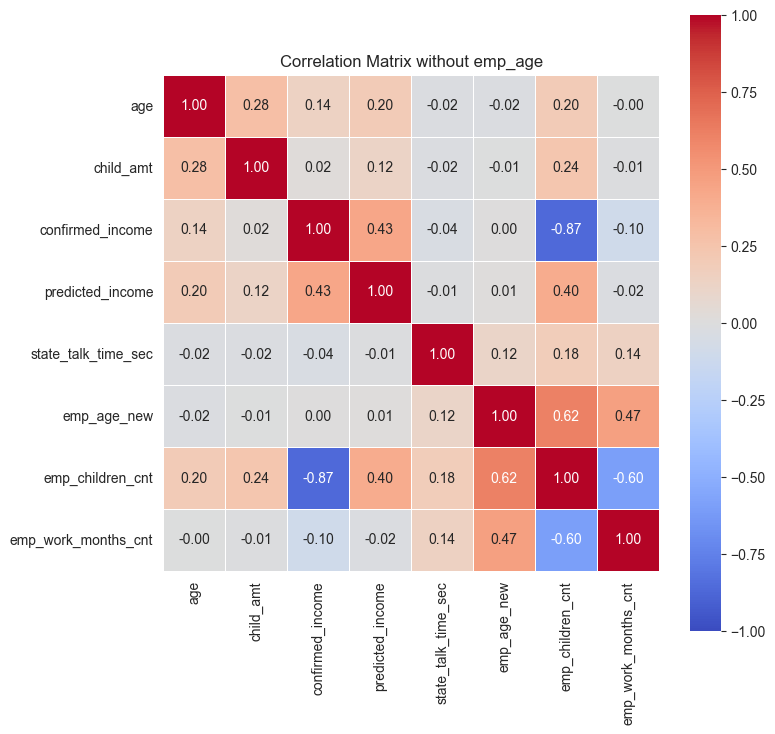

In [100]:
correlation_matrix = data[numeric_columns.drop(['emp_age'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without emp_age')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

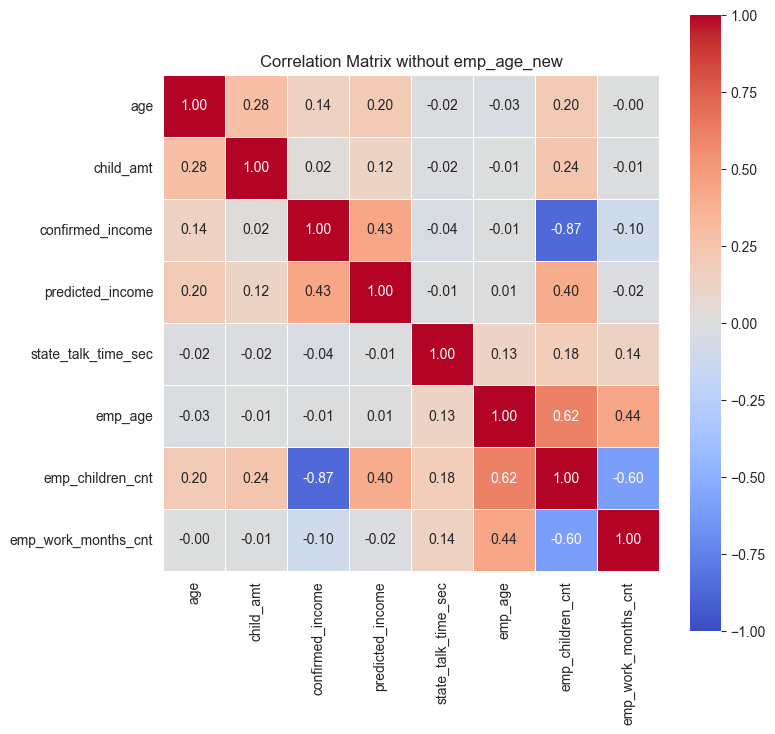

In [101]:
correlation_matrix = data[numeric_columns.drop(['emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without emp_age_new')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

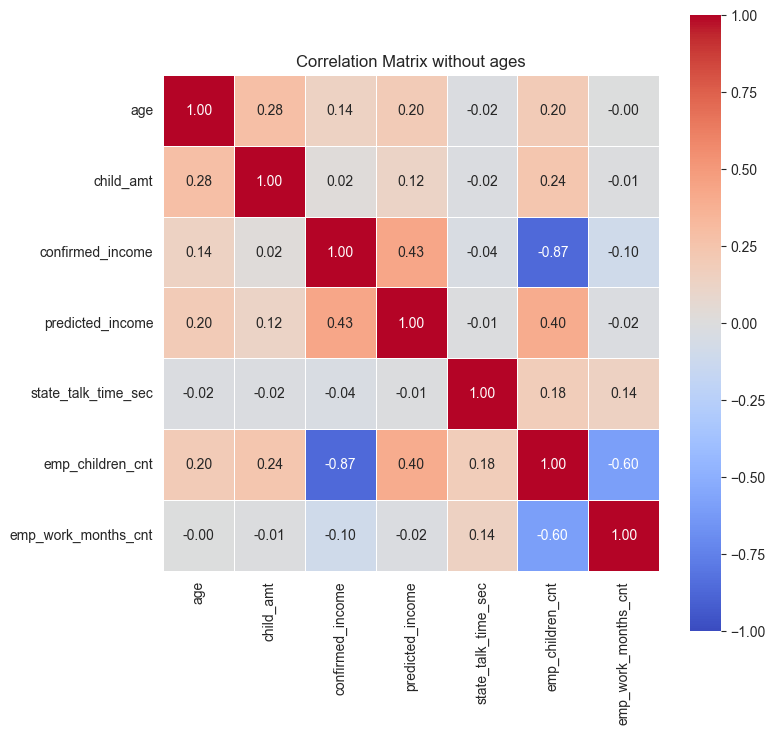

In [102]:
correlation_matrix = data[numeric_columns.drop(['emp_age', 'emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without ages')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

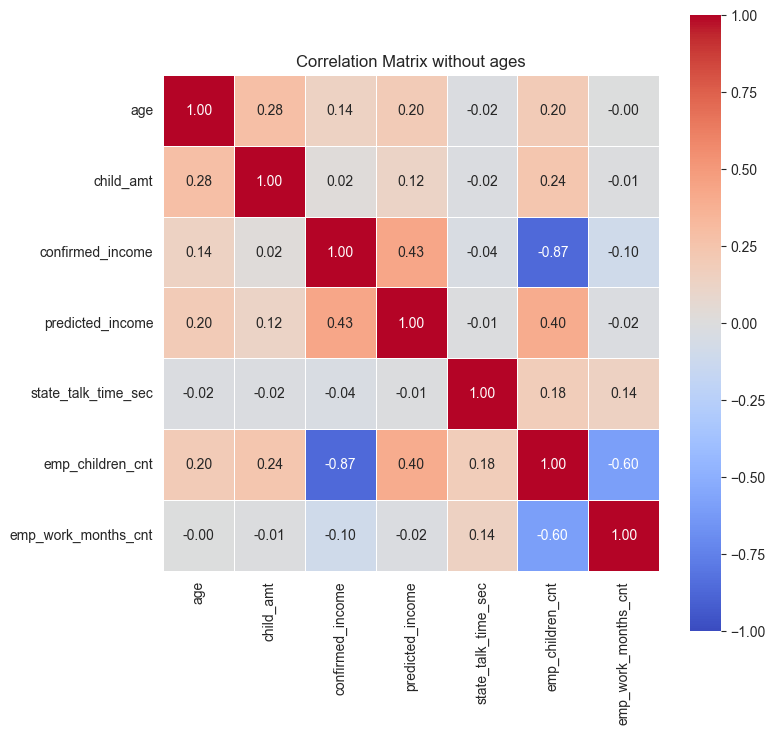

In [103]:
plt.show()
correlation_matrix = data[numeric_columns.drop(['emp_age', 'emp_age_new'])].corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.title('Correlation Matrix without ages')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, square=True)
plt.show()

#### Выводы

* Значение корреляции не меняются за счёт удаления столбцов с большим количеством пропусков. Чтобы убрать некоторые столбцы надо изменить numeric_columns.
* Я бы не рассматривал столбец emp_children_cnt и, так как он вызывает аномальные зависимости из-за большого количества пропусков
*   Имеется небольшая положительная линейная зависимость между продолжительностью разговора и количеством месяцев работы сотрудника (можно предположить, чем дольше работает сотрудник, тем дольше он может удержать клиента, значит с большим шансом завершит звонок успешно)
*   Количество лет клиента, количество детей клиента и доход имеют между собой малую положительную линейную зависимость (очевидно)
*   Предсказанный доход и подтвержденный доход имеют положительную корреляцию (что ничего не говорит)


### Версия для презы

In [104]:
columns = pd.Index(['age', 'child_amt', 'confirmed_income', 'state_talk_time_sec',
                    'emp_age_new', 'emp_work_months_cnt'], dtype=object)

Берём только количественные признаки, но убираем столбцы predicted_income, так как столбец confirmed_income даст больше полезной информации, и emp_work_months_cnt, так как 99% пропусков.

C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_27016\1737164386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(


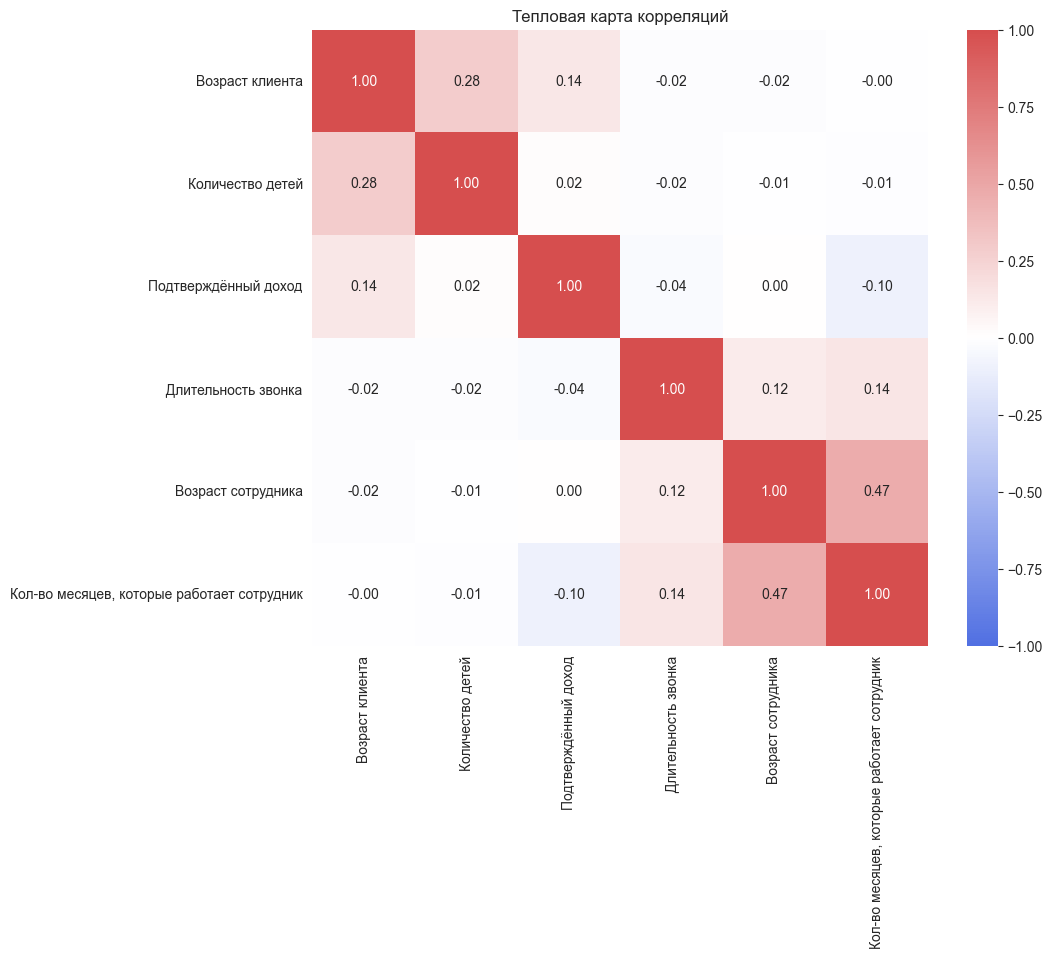

In [105]:
import matplotlib.colors as mcolors

colors = ["#5170E2", "#FFFFFF", "#D64E4E"]

cmap_name = "custom_cmap"
cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

df1 = data[columns]
df1.rename(
    columns={'age': 'Возраст клиента', 'child_amt': 'Количество детей', 'confirmed_income': 'Подтверждённый доход',
             'state_talk_time_sec': ' Длительность звонка',
             'emp_age_new': 'Возраст сотрудника', 'emp_work_months_cnt': 'Кол-во месяцев, которые работает сотрудник'},
    inplace=True)
correlation_matrix = df1.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Тепловая карта корреляций")
plt.show()

#### Выводы

*   Имеется небольшая положительная линейная зависимость между продолжительностью разговора и количеством месяцев работы сотрудника (можно предположить, чем дольше работает сотрудник, тем дольше он может удержать клиента, значит с большим шансом завершит звонок успешно)
*   Количество лет клиента, количество детей клиента и подтверждённый доходом имеют между собой малую положительную линейную зависимость (очевидно)


# Анализ

In [3]:
data

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,product,function,auto_and_entrepreneur_flg,region_category,age_group,age_group_dummies,age_difference,marital_status,work_experience_status,pro_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,Кредитная карта,Продажи и предложения,0.0,1,35-49,3.0,16.0,с партнером без детей,новичок,0
1,342841087,40.0,0.0,town,0.0,0.0,1.0,0.0,0.0,1.0,...,Кредит,Другое,0.0,1,35-49,3.0,0.0,одинокий с детьми,сеньор,0
2,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,Кредитная карта,Другое,0.0,1,25-34,2.0,2.0,с партнером с детьми,новичок,0
3,505902204,19.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,Кредитная карта,Другое,0.0,1,14-24,1.0,6.0,одинокий,новичок,0
4,63047752,52.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,Кредит,Продажи и предложения,0.0,1,50-64,4.0,23.0,с партнером без детей,сеньор,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,139422099,31.0,0.0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,Кредитная карта,Продажи и предложения,0.0,1,25-34,2.0,4.0,с партнером без детей,опытный,0
9513,305282509,39.0,0.0,urban,0.0,1.0,0.0,0.0,1.0,2.0,...,Кредитная карта,Продажи и предложения,0.0,1,35-49,3.0,17.0,с партнером с детьми,новичок,0
9514,211662819,54.0,1.0,msk,0.0,1.0,0.0,0.0,1.0,0.0,...,Страхование и услуги,Другое,0.0,1,50-64,4.0,33.0,с партнером без детей,опытный,0
9515,265881723,35.0,0.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,Дебетовая карта,Продажи и предложения,0.0,1,35-49,3.0,4.0,одинокий,сеньор,0


In [6]:
columns = pd.Index(['gender_cd', 'age',
                    'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'pro_flg',
                    'child_amt', 'partnership_flg', 'realty_type','region_category', 'success_flg'],
                   dtype='object')

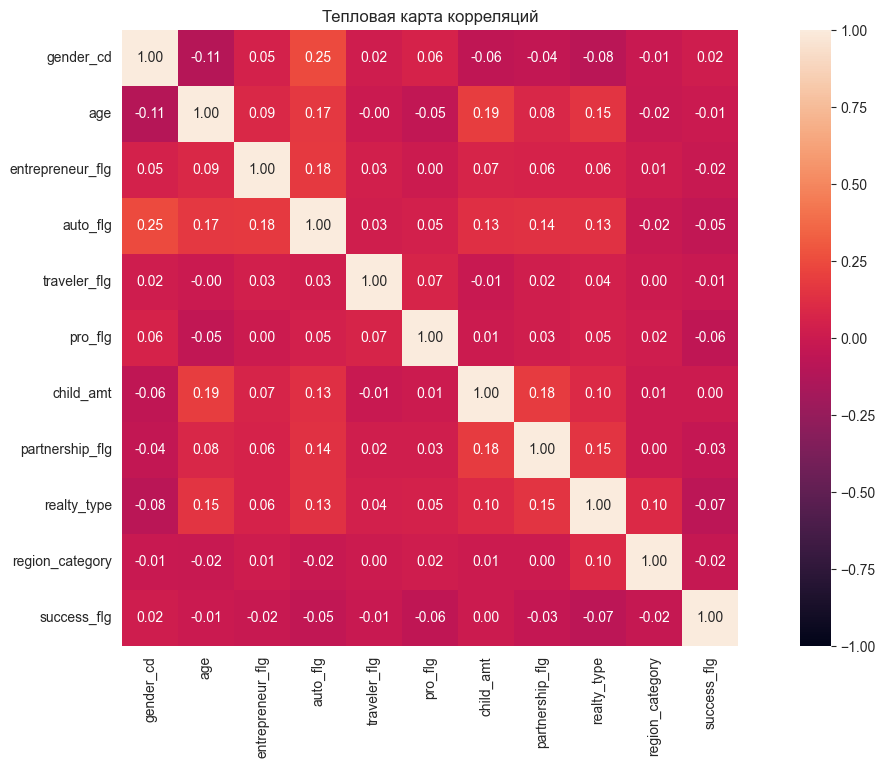

In [7]:
correlation_map = data[columns].corr(method='pearson')
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_map, annot=True, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Тепловая карта корреляций")
plt.show()


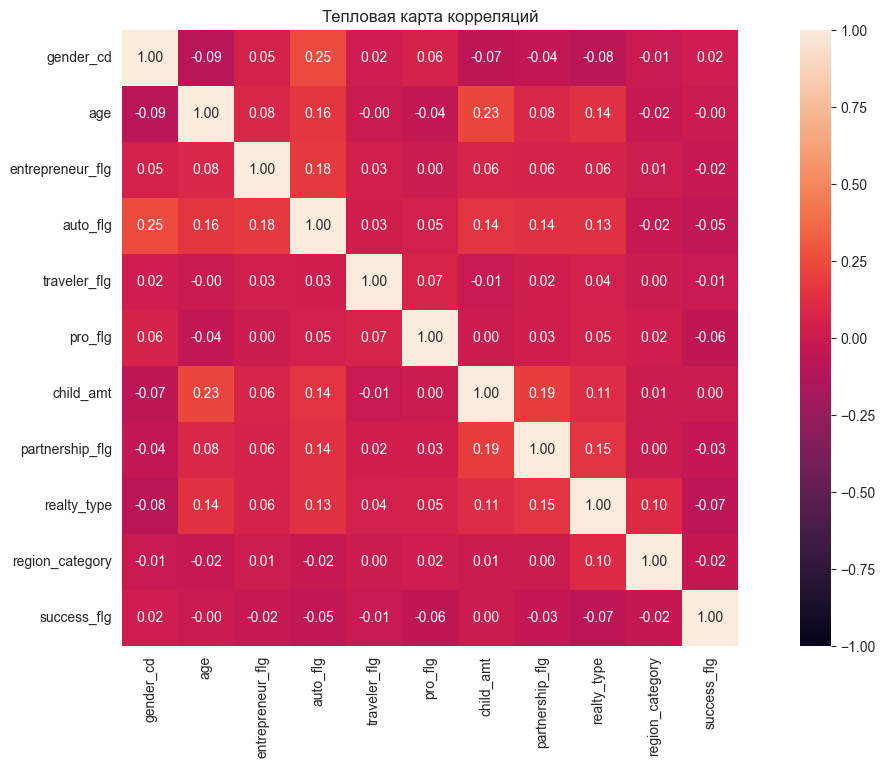

In [8]:
correlation_map = data[columns].corr(method='kendall')
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_map, annot=True, fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Тепловая карта корреляций")
plt.show()

# Eta

In [ ]:
categorical_columns = pd.Index(['gender_cd', 'region_size', 'foreign_flg',
                                'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
                                'realty_type', 'segment_cd', 'bundle_nm', 'product_cd', 'functional_cd',
                                'wo_hit_status_result_desc',
                                'wo_hit_status_reason_desc', 'emp_gender_cd',
                                'emp_citizenship_country_cd', 'emp_marital_status_cd'], dtype=object)

In [ ]:
num_cat_correlation_matrix = pd.DataFrame(index=categorical_columns, columns=numeric_columns, dtype=np.float64)

In [ ]:
for num_col in numeric_columns:
    for cat_col in categorical_columns:
        groups = [data[num_col][data[cat_col] == value] for value in data[cat_col].unique()]

        total_variance = np.var(data[num_col], ddof=1)
        group_means = [g.mean() for g in groups]
        group_sizes = [len(g) for g in groups]
        group_variance = sum(
            size * (mean - data[num_col].mean()) ** 2 for size, mean in zip(group_sizes, group_means)) / len(data)

        eta_squared = group_variance / total_variance
        num_cat_correlation_matrix.loc[cat_col, num_col] = eta_squared

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(num_cat_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1, fmt='.3f')
plt.show()

#### Вывод


* Продолжительность звонка имеет зависимость с результатом звонка (более продолжительные звонки в средней успешнее, очев)

Вобщем говно какое-то, ничего не получилось. Можно принципе вставить в презу убрав нулевые значения.